In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score  # 交互驗證
from sklearn.linear_model import Lasso  # 套索迴歸套件
from sklearn.model_selection import KFold

In [2]:
def find_best(X, y):
    
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    best_score = 0
    for i in range(1, 20, 1):
        lm_lasso = Lasso(alpha = i-0.9, max_iter = 1000000)
        if cross_val_score(lm_lasso, X, y, cv = cv, scoring='r2').mean() > best_score:
            best_score = cross_val_score(lm_lasso, X, y, cv = cv).mean()
            best_i = i-0.9
    best_range = [best_i-1.999, best_i+1.999]
    print(best_range)###
    
    if best_range[0] <= 0:
        narrow_i = 0.01
    else:
        narrow_i = best_range[0]

    global best_i2
    global best_lasso_model
    best_score2 = 0    
    while narrow_i <= best_range[1]:   
        # 建立Lasso回歸式，懲罰係數α
        lm_lasso = Lasso(alpha = narrow_i, max_iter = 1000000) 
        print(narrow_i, cross_val_score(lm_lasso, X, y, cv = cv).mean())
        if cross_val_score(lm_lasso, X, y, cv = cv).mean() > best_score2:
            best_score2 = cross_val_score(lm_lasso, X, y, cv = cv).mean()  
            best_i2 = narrow_i
            best_lasso_model = lm_lasso.fit(X, y)

        narrow_i += 0.01
        
    print('最佳懲罰係數：', best_i2,'最佳懲罰係數下之交叉驗證平均R^2' , best_score2) 
    best_i2 = best_i2
    # 获取非零系数的列名
    selected_features = X.columns[best_lasso_model.coef_ != 0]

    # 打印所选自变量
    print("Selected features:", selected_features)
    
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("R^2")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#8737ED")  # Purple color
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#0091DA")  # Blue color
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#8737ED",  # Purple color
             label="Training R^2")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#0091DA",  # Blue color
             label="Cross-validation R^2")

    plt.legend(loc="lower right")
    return plt


# LASSO_只有兩變數_小樣本

[-1.899, 2.099]
0.01 0.7080889859784538
0.02 0.7080894529119279
0.03 0.7080898857214134
0.04 0.7080902844069105
0.05 0.7080906489684191
0.060000000000000005 0.708090979405939
0.07 0.7080912757194705
0.08 0.7080915379090136
0.09 0.708091765974568
0.09999999999999999 0.7080919599161339
0.10999999999999999 0.7080921197337114
0.11999999999999998 0.7080922454273005
0.12999999999999998 0.7080923369969009
0.13999999999999999 0.7080923944425128
0.15 0.7080924177641365
0.16 0.7080924069617713
0.17 0.7080923620354177
0.18000000000000002 0.7080922829850758
0.19000000000000003 0.708092169810745
0.20000000000000004 0.708092022512426
0.21000000000000005 0.7080918410901185
0.22000000000000006 0.7080916255438223
0.23000000000000007 0.7080913758735378
0.24000000000000007 0.7080910920792648
0.25000000000000006 0.708090774161003
0.26000000000000006 0.708090422118753
0.2700000000000001 0.708090357979691
0.2800000000000001 0.7080899370242165
0.2900000000000001 0.7080894819441805
0.3000000000000001 0.708088

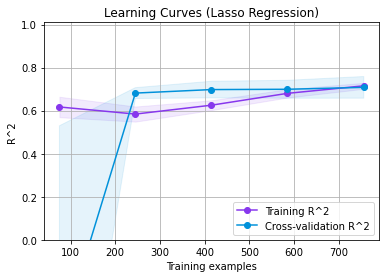

In [9]:
df = pd.read_csv("Kmeans_output_file.csv")
'''不納入油耗數據'''
included = ['enginesizel', 'cylinders']
X = df[included]
y = df["co2emissionsgkm"]

find_best(X, y)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
print('R^2：', cross_val_score(best_lasso_model, X, y, cv = cv, scoring='r2').mean()) 

'''scoring 參數應該是 'neg_mean_absolute_error'，而不是 'MAE'。
Scikit-learn的交叉驗證（cross-validation）默認使用"越大越好"的評分，
但MAE是一種"越小越好"的評分。因此，在使用MAE進行交叉驗證時，
我們應該使用其相反數（neg_mean_absolute_error）。'''
mae_scores = cross_val_score(best_lasso_model, X, y, cv=cv, scoring='neg_mean_absolute_error')

# 將分數取平均，並取其相反數
print('MAE:', -mae_scores.mean())

import matplotlib.pyplot as plt
# 繪製學習曲線
title = "Learning Curves (Lasso Regression)"
plot_learning_curve(best_lasso_model, title, X, y, cv=cv, ylim=(0.0, 1.01), n_jobs=1)

plt.show()

# LASSO_只有兩變數_大樣本

[-1.899, 2.099]
0.01 0.7171258705976639
0.02 0.7171256839005802
0.03 0.7171254577191893
0.04 0.7171251920534918
0.05 0.7171248869034874
0.060000000000000005 0.7171245422691761
0.07 0.717124158150558
0.08 0.7171237345476331
0.09 0.7171232714604011
0.09999999999999999 0.7171227688888624
0.10999999999999999 0.7171222268330167
0.11999999999999998 0.7171216452928644
0.12999999999999998 0.7171210242684051
0.13999999999999999 0.7171203637596387
0.15 0.7171196637665658
0.16 0.7171189242891859
0.17 0.7171181453274991
0.18000000000000002 0.7171173268815053
0.19000000000000003 0.7171164689512048
0.20000000000000004 0.7171155715365976
0.21000000000000005 0.7171146346376833
0.22000000000000006 0.7171136582544622
0.23000000000000007 0.7171126423869342
0.24000000000000007 0.7171115870350994
0.25000000000000006 0.7171104921989577
0.26000000000000006 0.7171093578785093
0.2700000000000001 0.7171081840737538
0.2800000000000001 0.7171069707846914
0.2900000000000001 0.7171057180113223
0.3000000000000001 0.

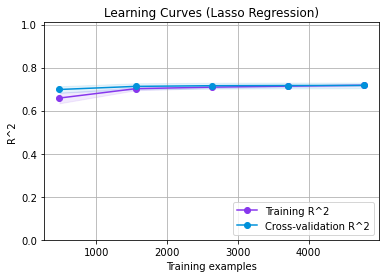

In [6]:
df = pd.read_excel("curb_weight_bigdata_without2022.xlsx")

included = ['Engine Size(L)', 'Cylinders']
X = df[included]
y = df["CO2 Emissions(g/km)"]

find_best(X, y)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
print('R^2:', cross_val_score(best_lasso_model, X, y, cv = cv, scoring='r2').mean()) 

mae_scores = cross_val_score(best_lasso_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
# 將分數取平均，並取其相反數
print('MAE:', -mae_scores.mean())

import matplotlib.pyplot as plt
# 繪製學習曲線
title = "Learning Curves (Lasso Regression)"
plot_learning_curve(best_lasso_model, title, X, y, cv=cv, ylim=(0.0, 1.01), n_jobs=1)

plt.show()

# LASSO_變數全放

[-1.899, 2.099]
0.01 0.8549684390823323
0.02 0.8556045401236367
0.03 0.8557169706244355
0.04 0.8554180443849791
0.05 0.8546887242041672
0.060000000000000005 0.853667124899148
0.07 0.8524759438980649
0.08 0.851458507545068
0.09 0.8504319823611894
0.09999999999999999 0.8492147641562553
0.10999999999999999 0.8477929937476439
0.11999999999999998 0.8463228778930466
0.12999999999999998 0.8447891576852706
0.13999999999999999 0.8431309464305186
0.15 0.8413537342827467
0.16 0.8394739223067665
0.17 0.8381942127384301
0.18000000000000002 0.8371012344343439
0.19000000000000003 0.8360016740873387
0.20000000000000004 0.8349312188142379
0.21000000000000005 0.8338022076766368
0.22000000000000006 0.832602873752647
0.23000000000000007 0.831348105208557
0.24000000000000007 0.8301778820374743
0.25000000000000006 0.8291329569314438
0.26000000000000006 0.8280385786360325
0.2700000000000001 0.8268663749861981
0.2800000000000001 0.8258254881015101
0.2900000000000001 0.8248631458627388
0.3000000000000001 0.823

MAE: 18.228087377539975


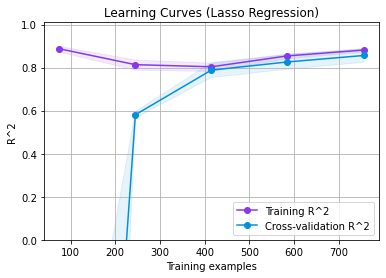

In [5]:
df = pd.read_csv("Kmeans_output_file.csv")

'''不納入油耗數據'''
X = df.drop(["co2emissionsgkm", "make", "model", "car_or_truck", "vehicleclass", "transmission",
             "fuelconsumptioncityl100km","fuelconsumptionhwyl100km", "fuelconsumptioncombl100km", 
             "fuelconsumptioncombmpg", "co2rating", "smograting", "carnumber", 'Cluster'], axis = 1)  # x為特徵資料
y = df["co2emissionsgkm"]

find_best(X, y)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
print('R^2:', cross_val_score(best_lasso_model, X, y, cv = cv, scoring='r2').mean()) 

mae_scores = cross_val_score(best_lasso_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
# 將分數取平均，並取其相反數
print('MAE:', -mae_scores.mean())

import matplotlib.pyplot as plt
# 繪製學習曲線
title = "Learning Curves (Lasso Regression)"
plot_learning_curve(best_lasso_model, title, X, y, cv=cv, ylim=(0.0, 1.01), n_jobs=1)

plt.show()

# 一般線性回歸_只放兩變數

P-values:
const          9.574146e-143
enginesizel     1.454067e-16
cylinders       1.771166e-26
dtype: float64
Cross-Validation R^2 Scores: [0.67730549 0.63766765 0.70919753 0.72739075 0.78888069]
Mean of Cross-Validation R^2 Scores: 0.7080884234264868
MAE: 26.18447464913539


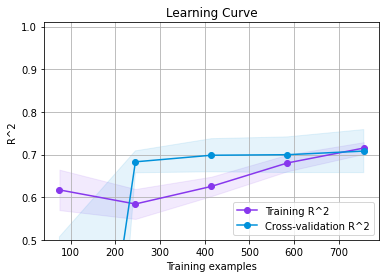

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
import statsmodels.api as sm

# 讀取資料
df = pd.read_csv('Kmeans_output_file.csv') 

# 篩選包含缺失值的列
df = df.dropna(subset=['co2emissionsgkm', 'enginesizel', 'cylinders'])

# 定義 x 和 y
included = ['enginesizel', 'cylinders']
X = df[included]
y = df['co2emissionsgkm']

# 添加常數項
X = sm.add_constant(X)

# 利用statsmodels進行一般線性迴歸
model = sm.OLS(y, X).fit()

# 檢視 p-values
print("P-values:")
print(model.pvalues)

# 顯著性水準 (significance level)，通常是0.05
alpha = 0.05

# 篩選掉 p-value 大於顯著性水準的變數
significant_vars = model.pvalues[model.pvalues < alpha].index

# 重新定義 X 只包含顯著變數
X = X[significant_vars]

# 初始化一般線性迴歸模型
linear_model = LinearRegression()

# 初始化交叉驗證
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 計算交叉驗證分數
cv_scores = cross_val_score(linear_model, X, y, cv=cv, scoring='r2')  # 使用R^2作為評估標準

# 輸出交叉驗證分數
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean of Cross-Validation R^2 Scores:", np.mean(cv_scores))

mae_scores = cross_val_score(linear_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
# 將分數取平均，並取其相反數
print('MAE:', -mae_scores.mean())

# 繪製學習曲線
plot_learning_curve(linear_model, "Learning Curve", X, y, cv=cv, ylim=(0.5, 1.01), n_jobs=4)

plt.show()


# 一般線性回歸_變數全放

Cross-Validation R^2 Scores: [0.8065211  0.8179967  0.85887122 0.83663061 0.8915099 ]
Mean of Cross-Validation R^2 Scores: 0.842305903890647
MAE: 19.038944307404485


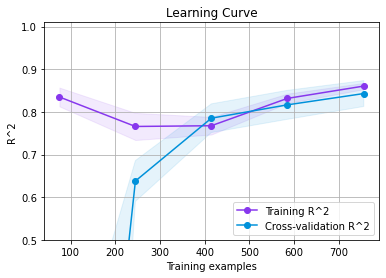

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, cross_val_score,KFold
import statsmodels.api as sm

# 讀取資料
df = pd.read_csv('Kmeans_output_file.csv')

# 篩選包含缺失值的列
df = df.dropna(subset=['co2emissionsgkm', 'enginesizel', 'cylinders'])

# 定義 x 和 y
X = df.drop(["co2emissionsgkm", "make", "model", "car_or_truck", "vehicleclass", "transmission",
             "fuelconsumptioncityl100km","fuelconsumptionhwyl100km", "fuelconsumptioncombl100km", 
             "fuelconsumptioncombmpg", "co2rating", "smograting", "carnumber", 'Cluster'], axis=1)  # x為特徵資料
y = df['co2emissionsgkm']

# 添加常數項
X = sm.add_constant(X)

# 利用statsmodels進行一般線性迴歸
model = sm.OLS(y, X).fit()

# 顯著性水準 (significance level)，通常是0.05
alpha = 0.05

# 篩選掉 p-value 大於顯著性水準的變數
significant_vars = model.pvalues[model.pvalues < alpha].index

# 重新定義 X 只包含顯著變數
X = X[significant_vars]

# 初始化一般線性迴歸模型
linear_model = LinearRegression()

# 初始化交叉驗證
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 計算交叉驗證分數
cv_scores = cross_val_score(linear_model, X, y, cv=cv, scoring='r2')  # 使用R^2作為評估標準

# 輸出交叉驗證分數
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean of Cross-Validation R^2 Scores:", np.mean(cv_scores))

mae_scores = cross_val_score(linear_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
# 將分數取平均，並取其相反數
print('MAE:', -mae_scores.mean())

# 繪製學習曲線
plot_learning_curve(linear_model, "Learning Curve", X, y, cv=cv, ylim=(0.5, 1.01), n_jobs=4)

plt.show()